In [1]:
import json
import numpy as np
import pandas as pd
import pymongo
from bson import json_util as ujson
from Database import MongoDB

## Data pulled from MongoDB

In [2]:
db = MongoDB()
db.connection()
#docs = db.cols.find()
from bson import ObjectId
# Fetch data from collection
data = list(db.cols.find())

# Convert _id field to ObjectId
for item in data:
    item['_id'] = str(item['_id'])


## Data Normalized

In [3]:

df = pd.DataFrame(data)
dft = pd.DataFrame(pd.json_normalize(df['Technical_details']))
dfa = pd.DataFrame(pd.json_normalize(df['Additional_details']))
cdf = pd.concat([df,dft,dfa],axis=1)

In [4]:
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 200

In [5]:
del dft , dfa

In [10]:
cdf.groupby(['Search','Page']).count()

_id  Name  Price  Stars  Ratings  Answered_Questions  \
Search      Page                                                         
hat         1       7     7      7      7        7                   7   
laptop      1      34    34     34     34       34                  34   
            2      12    12     12     12       12                  12   
            3      17    17     17     17       17                  17   
            4      12    12     12     12       12                  12   
            5      12    12     12     12       12                  12   
            6      10    10     10     10       10                  10   
            7       9     9      9      9        9                   9   
            8      10    10     10     10       10                  10   
            9      15    15     15     15       15                  15   
            10     15    15     15     15       15                  15   
mobile      1      60    60     60     60       60                  60   
            2      49    49     49     49       49                  49   
            3      44    44     44     44       44                  44   
            4      49    49     49     49       49                  49   
            5      27    27     27     27       27                  27   
            6      22    22     22     22       22                  22   
            7      22    22     22     22       22                  22   
            8      22    22     22     22       22                  22   
            9      27    27     27     27       27                  27   
            10     27    27     27     27       27                  27   
            11     20    20     20     20       20                  20   
smartphones 1      88    88     88     88       88                  88   
            2      73    73     73     73       73                  73   
            3      72    72     72     72       72                  72   
            4      79    79     79     79       79                  79   
            5      82    82     82     82       82                  82   
            6      79    79     79     79       79                  79   
            7      82    82     82     82       82                  82   
            8      82    82     82     82       82                  82   
            9      71    71     71     71       71                  71   
            10     81    81     81     81       81                  81   
            11     44    44     44     44       44                  44   
            12     51    51     51     51       51                  51   
            13     51    51     51     51       51                  51   
            14     52    52     52     52       52                  52   
            15     43    43     43     43       43                  43   
            16     41    41     41     41       41                  41   
            17     56    56     56     56       56                  56   
            18     49    49     49     49       49                  49   
            19     46    46     46     46       46                  46   
            20     24    24     24     24       24                  24   
toys        1      75    75     75     75       75                  75   
            2      65    65     65     65       65                  65   
            3      61    61     61     61       61                  61   
            4      66    66     66     66       66                  66   
            5      60    60     60     60       60                  60   
            6      64    64     64     64       64                  64   
            7      32    32     32     32       32                  32   

                  Amazon_Services  Description  Technical_details  \
Search      Page                                                    
hat         1                   7            7                  7   
laptop      1                  34   

In [16]:
grouped_data = cdf.groupby(['Search', 'Page'])['Price'].sum().reset_index()
pivot_table = pd.pivot_table(grouped_data, values='Price', index='Search', columns='Page', fill_value=0)

Overview of the data


In [11]:
grouped_data = cdf.groupby(['Search', 'Page'])['Price'].sum()


In [17]:
pivot_table

Page              1        2        3        4        5        6        7   \
Search                                                                       
hat             3528        0        0        0        0        0        0   
laptop       1300697   475590   653253   751932   607898   371179   586957   
mobile       1272805  1536452  1026840  1566354   780463   516743   630829   
smartphones  1564161  2013672  1684493  2212547  2813818  2061762  2470003   
toys           83775   116585   111404   123066   117285   125980   106117   

Page              8        9        10       11       12       13       14  \
Search                                                                       
hat                0        0        0        0        0        0        0   
laptop        432551   576231   807292        0        0        0        0   
mobile        489212   985879  1203839   737383        0        0        0   
smartphones  2222472  1784215  2572660  1024550  1096567  1315624  1145378   
toys               0        0        0        0        0        0        0   

Page              15       16       17       18       19       20  
Search                                                             
hat                0        0        0        0        0        0  
laptop             0        0        0        0        0        0  
mobile             0        0        0        0        0        0  
smartphones  1116531  1019785  1483828  1345531  1173803  1335899  
toys               0        0        0        0        0        0

In [12]:
grouped_data

Search       Page
hat          1          3528.0
laptop       1       1300697.0
             2        475590.0
             3        653253.0
             4        751932.0
             5        607898.0
             6        371179.0
             7        586957.0
             8        432551.0
             9        576231.0
             10       807292.0
mobile       1       1272805.0
             2       1536452.0
             3       1026840.0
             4       1566354.0
             5        780463.0
             6        516743.0
             7        630829.0
             8        489212.0
             9        985879.0
             10      1203839.0
             11       737383.0
smartphones  1       1564161.0
             2       2013672.0
             3       1684493.0
             4       2212547.0
             5       2813818.0
             6       2061762.0
             7       2470003.0
             8       2222472.0
             9       1784215.0
             10      

In [18]:
cdf


_id  \
0     643436e3a805f2aba00f3a7b   
1     643436e8a805f2aba00f3a7c   
2     643436eda805f2aba00f3a7d   
3     643436f1a805f2aba00f3a7e   
4     643436f6a805f2aba00f3a7f   
...                        ...   
2186  643c8d774b37f2b9b4e6d7ca   
2187  643c8d7f4b37f2b9b4e6d7cb   
2188  643c8d864b37f2b9b4e6d7cc   
2189  643c8d914b37f2b9b4e6d7cd   
2190  643c8d954b37f2b9b4e6d7ce   

                                                   Name     Price  Stars  \
0     Redmi 12C (Lavender Purple, 6GB RAM, 128GB Sto...   10999.0    0.0   
1     Redmi Note 12 5G Mystique Blue 4GB RAM 128GB R...   17999.0    3.9   
2     OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...   18999.0    4.3   
3         Redmi 12C (Royal Blue, 4GB RAM, 64GB Storage)    8999.0    0.0   
4     Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...    8499.0    3.9   
...                                                 ...       ...    ...   
2186                  Apple iPhone 14 Pro (1 TB) - Gold  169999.0    4.5   
2187      Redmi 12C (Royal Blue, 4GB RAM, 64GB Storage)    9499.0    0.0   
2188  Nokia C31, 6.74” HD+ Display, 13+2+2 MP Rear &...    9999.0    3.3   
2189  Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1...   16999.0    4.1   
2190                  Apple iPhone 14 Pro (1 TB) - Gold  169999.0    4.5   

      Ratings  Answered_Questions  \
0           0                   0   
1        2883                 206   
2      117898                1000   
3           0                   0   
4        2849                 299   
...       ...                 ...   
2186      384                 103   
2187        0                   3   
2188       53                   9   
2189    26506                1000   
2190      384                 103   

                                        Amazon_Services  \
0     ["Free Delivery", "Pay on Delivery", "7 days R...   
1     ["Free Delivery", "Pay on Delivery", "7 days R...   
2     ["Free Delivery", "Pay on Delivery", "7 days R...   
3     ["Free Delivery", "Pay on Delivery", "7 days R...   
4     ["Free Delivery", "Pay on Delivery", "7 days R...   
...                                                 ...   
2186  ["Free Delivery", "7 days Replacement", "Warra...   
2187  ["Free Delivery", "Pay on Delivery", "7 days R...   
2188  ["Free Delivery", "Pay on Delivery", "7 days R...   
2189  ["Free Delivery", "Pay on Delivery", "7 days R...   
2190  ["Free Delivery", "7 days Replacement", "Warra...   

                                            Description  \
0     ["Processor: High performance MediaTek Helio G...   
1     ["Display: Super AMOLED (1080x2400) Display wi...   
2     ["Camera: 64MP Main Camera with EIS; 2MP Depth...   
3     ["Processor: High performance MediaTek Helio G...   
4     ["Powerful MediaTek Helio P35 Octa Core 2.3GHz...   
...                                                 ...   
2186  ["15.54 cm (6.1-inch) Super Retina XDR display...   
2187  ["Processor: High performance MediaTek Helio G...   
2188  ["Dazzling 6.7\u201d HD+ display.", "Up to 3-d...   
2189  ["Exynos 1280 Octa Core 2.4GHz 5nm Processor w...   
2190  ["15.54 cm (6.1-inch) Super Retina XDR display...   

                                      Technical_details  \
0     {'OS': 'MIUI 13, Android 12.0', 'RAM': '128 GB...   
1     {'OS': 'MIUI 13', 'RAM': '128 GB', 'Product_Di...   
2     {'OS': 'OxygenOS', 'RAM': '6 GB', 'Product_Dim...   
3     {'OS': 'MIUI 13, Android 12.0', 'RAM': '64 GB'...   
4     {'OS': 'Android 12.0', 'RAM': '4 GB', 'Product...   
...                                                 ...   
2186                   {'No Data Available': 'No Data'}   
2187  {'OS': 'MIUI 13, Android 12.0', 'RAM': '64 GB'...   
2188  {'OS': 'Android 12.0', 'RAM': '4 GB', 'Product...   
2189  {'OS': 'Android 12.0', 'RAM': '6 GB', 'Product...   
2190                   {'No Data Available': 'No Data'}   

                                     Additional_details  \
0     {'ASIN': 'B0BYN4LFT6', 'Best_Sellers_Rank': '#...   
1     {'ASIN': 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a color map
cmap = ListedColormap(['red', 'orange', 'yellow', 'green', 'blue'])

# Create a scatter plot with color gradient
plt.scatter(x_data, y_data, c=price_data, cmap=cmap)
plt.colorbar()
plt.show()

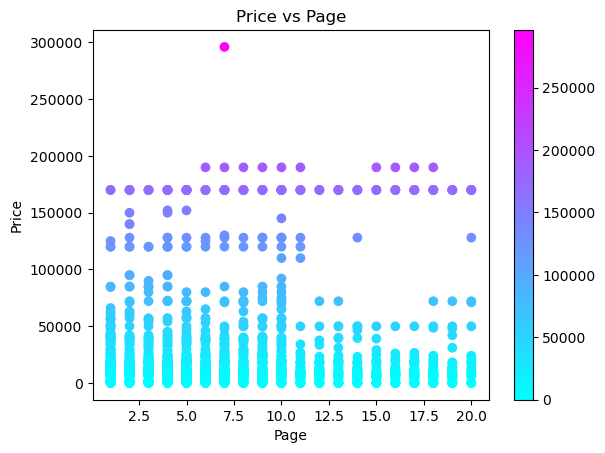

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a color map
cmap = ListedColormap(['red', 'orange', 'yellow', 'green', 'blue'])

# Create a scatter plot with color gradient
#plt.scatter(x_data, y_data, c=price_data, cmap=cmap)
plt.scatter(cdf['Page'], cdf['Price'], c=cdf['Price'], cmap='cool')

# set the title and axis labels
plt.title('Price vs Page')
plt.xlabel('Page')
plt.ylabel('Price')

# add a colorbar to show the price gradient
plt.colorbar()

# show the plot
plt.show()